# 課題1
ボールを投げる場合を考える。
$t = 0$において$v_x = 10$ [m/sec]， $v_y =0$ [m/sec], $x=0$ [m], $y = 100$ [m]
とした時の，ボールの軌跡を残しながらアニメーションとエネルギーのアニメーションを同時表示しなさい。時間の刻み幅は $dt=0.01$ secで考えなさい。ただし，全ての点をプロットすると非常に時間がかかるため，プロットは50点(0.5 sec)おきにするものとする。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

ims = [] 
x_array = []
y_array = []    
E_array = []
t_array = []

fig = plt.figure(figsize=(20, 10))
ax_u = fig.add_subplot(1, 2, 1)
ax_u.set_xlabel('x [m]')
ax_u.set_ylabel('y [m]')
ax_u.set_xlim(0,200)
ax_u.set_ylim(0,120)

ax_l = fig.add_subplot(1, 2, 2)
ax_l.set_xlabel('t [sec]')
ax_l.set_ylabel('E [J]')

plt.close()
 
g = 9.8   # 重力加速度[m/s^2]
t = 0
dt = 0.01  # 時間幅[sec]
x = 0
y = 100
vx = 10   # x方向の初期速度[m/s] 
vy = 0    # y方向の初期速度[m/s]
m = 1     # 質量[kg]

for i in range(2000):
    vx = vx          # x方向の速度成分
    x = x + vx * dt
    if y > 0:
      vy = vy - g * dt
      y = y + vy * dt
    elif y <= 0:
      vy = - vy
      y = vy * dt

    E = 1/2 * m * (vx**2 + vy**2) + m * g * y
    t = t + dt       # 時刻[sec]

    if i % 50 == 0:
      x_array = np.append(x_array, x)     
      y_array = np.append(y_array, y)
      E_array = np.append(E_array, E)
      t_array = np.append(t_array, t)
      ball = ax_u.plot(x_array, y_array, c='red', marker='o')
      energy = ax_l.plot(t_array, E_array, c='blue', marker='o')
      ims.append(ball + energy)


ani = animation.ArtistAnimation(fig, ims) # アニメーションを作成
rc('animation', html='jshtml')            # Google Colaboratoryの場合必要
ani

# 課題2
長さが10の1次元の棒における熱伝導を考える。時刻$t = 0$において，左端の温度を$T=255$ 度，その以外の領域の温度が0 度であるとする。$t>0$において左端を熱するのをやめ，右端も浮かせ，断熱状態(外部からの熱の出入りが遮断されている状態)とする。255 度で保った時の$t=300$における一次元棒の温度分布を色で示しなさい。ただし，温度が高い方が赤色，温度が低い方を青色とする。また右端は0 度に熱アンカーされており，拡散係数は$D=0.1$であるとする。$\Delta t = 1$，$\Delta x =1$とする。$t=300$における一次元棒の温度分布をグラフにしなさい。ただし，拡散係数は$D=0.1$であるとし，$\Delta t = 1$，$\Delta x =1$とする。

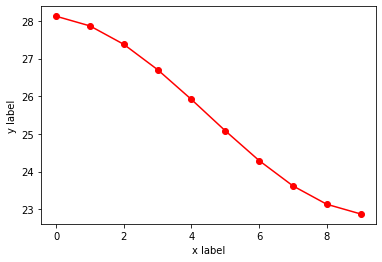

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D = 0.1
end_time = 300
length = 10
T = np.empty((end_time, length)) #((t, x))

#初期化
for x in range (length): #t=0ではT=0
  T[0][x] = 0

T[0][0] = 255


for t in range( end_time-1 ):
  for x in range(1, length -1):
    T[t+1][x] = T[t][x] + D*(-2*T[t][x] + T[t][x-1] + T[t][x+1])

  T[t+1][length -1] = T[t][length -1] + D*(-T[t][length -1] + T[t][length -2])
  T[t+1][0]         = T[t][0] + D*(-T[t][0] + T[t][1])


dist = [] 
temp = []

for i in range(10):
  dist = np.append(dist, i)
  temp = np.append(temp, T[end_time-1][i])

fig = plt.figure()             # キャンバス作成
ax = fig.add_subplot(1, 1, 1)  # 座標軸作成
ax.plot(dist, temp, color='red', marker='o', linestyle='-')   #青色，●，ライン無し
ax.set_xlabel('x label')
ax.set_ylabel('y label')
plt.show()                    # 表示

# 課題3
縦25x横50のピクセルサイズでの2次元のインクの拡散を考える。時刻$t=0$で$(x, y)=(25, 10)$に$10^5$個の赤い粒子を導入したとき，$t=100$における粒子の分布を図として表しなさい。ただし，拡散係数は$D=0.2$，$\Delta t = 1$，また$\Delta x = \Delta y =1$とする。

99999.98094110827


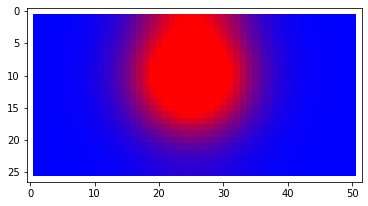

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

particle_numbers = 10**5
end_time = 100
N = np.empty(((end_time + 1, 27, 52)))


#初期化
for y in range (0, 27, 1):
    for x in range (0, 52, 1):
            N[0][y][x] = 0
            
N[0][10][25] = particle_numbers

for t in range (0, end_time, 1):
    for x in range (0, 52, 1):
        N[t+1][0][x] = 0 #上の境界
        N[t+1][26][x] = 0 #下の境界
    for y in range (0, 27, 1):
        N[t+1][y][0] = 0 #左の境界
        N[t+1][y][51] = 0 #右の境界

    for y in range (1, 26, 1):
        for x in range (1, 51, 1):
            if (x == 1 and y == 1): # 左上角
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y+1][x] + N[t][y][x+1] - 2 * N[t][y][x])
            elif (x == 50 and y == 1): # 右上角
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y+1][x] + N[t][y][x-1] - 2 * N[t][y][x])
            elif (x == 1 and y == 25): #左下角
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y-1][x] + N[t][y][x+1] - 2 * N[t][y][x])
            elif (x == 50 and y == 50): #右下角
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y-1][x] + N[t][y][x-1] - 2 * N[t][y][x])
            elif (x == 1): #左壁
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y-1][x] + N[t][y+1][x]+N[t][y][x+1] - 3 * N[t][y][x])
            elif (x == 50): #右壁
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y-1][x] + N[t][y+1][x]+N[t][y][x-1] - 3 * N[t][y][x])
            elif (y == 1): #上壁
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y+1][x] + N[t][y][x+1]+N[t][y][x-1] - 3 * N[t][y][x])
            elif (y == 25): #下壁
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y-1][x] + N[t][y][x+1]+N[t][y][x-1] - 3 * N[t][y][x])
            else:
                N[t+1][y][x] = N[t][y][x] + 0.2 *(N[t][y-1][x] + N[t][y+1][x] + N[t][y][x-1] + N[t][y][x+1] - 4 * N[t][y][x])
N_sum = 0
for x in range (0, 52, 1):
    for y in range (0, 27, 1):
        N_sum = N_sum + N[end_time][y][x]  
print(N_sum)
                
image = np.empty(((27, 52, 3)), int)

for y in range (0, 27, 1):
    for x in range(0, 52, 1):
        if (x == 0 or x == 51 or y == 0 or y == 26):
            red = 255
            green = 255
            blue = 255
        else:
            red = N[end_time][y][x]
            green = 0
            blue = 255 - N[end_time][y][x]
        if red >=255:
            red = 255
        if blue <= 0:
            blue = 0
        image[y][x] = [red, green, blue]

plt.imshow(image)